In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# 2. Distribuciones de probabilidad discretas.

In [2]:
def combinatoria (n,x):
    return np.math.factorial(n)/(np.math.factorial(x)*np.math.factorial(n-x))

def binomial (x,n,p):
    return combinatoria(n,x)*(p**x)*((1-p)**(n-x))

def poisson (x,miu=1):
    return (np.exp(-miu)*(miu**x))/np.math.factorial(x)

# 1.

In [3]:
n1 = 5
a1 = 1
x1 = np.array([0.,1.])
n2 = 25
a2 = 5
x2 = np.array([0.,1.,2.,3.,4.,5.])
np_ = 100
p = np.linspace(0,1,np_)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_18308/527910528.py:2: DeprecationWarning: Using factorial() with floats is deprecated
  return np.math.factorial(n)/(np.math.factorial(x)*np.math.factorial(n-x))


Text(0, 0.5, 'Probabilodad de aceptación')

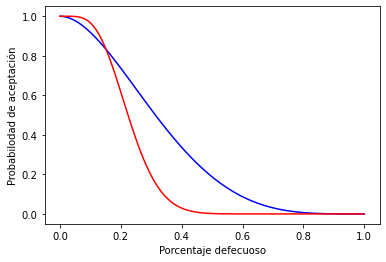

In [4]:
P1 = np.zeros(shape=np.shape(p))
c = 0
for i in p:
    p_ = 0.
    for j in x1:
        p_ += binomial(j,n1,i)
    P1[c] = p_
    c += 1

P2 = np.zeros(shape=np.shape(p))
c = 0
for i in p:
    p_ = 0.
    for j in x2:
        p_ += binomial(j,n2,i)
    P2[c] = p_
    c += 1

plt.plot(p,P1,color='b',label='Plan 1')
plt.plot(p,P2,color='r',label='Plan 2')
plt.xlabel('Porcentaje defecuoso')
plt.ylabel('Probabilodad de aceptación')

a)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_18308/527910528.py:2: DeprecationWarning: Using factorial() with floats is deprecated
  return np.math.factorial(n)/(np.math.factorial(x)*np.math.factorial(n-x))


Text(0, 0.5, 'Probabilodad de aceptación')

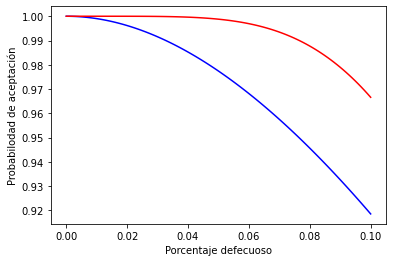

In [5]:
p = np.linspace(0.,0.1,np_)

P1 = np.zeros(shape=np.shape(p))
c = 0
for i in p:
    p_ = 0.
    for j in x1:
        p_ += binomial(j,n1,i)
    P1[c] = p_
    c += 1

P2 = np.zeros(shape=np.shape(p))
c = 0
for i in p:
    p_ = 0.
    for j in x2:
        p_ += binomial(j,n2,i)
    P2[c] = p_
    c += 1

plt.plot(p,P1,color='b',label='Plan 1')
plt.plot(p,P2,color='r',label='Plan 2')
plt.xlabel('Porcentaje defecuoso')
plt.ylabel('Probabilodad de aceptación')

Como podemos observar en la gráfica, el plan de a=5 y n=25 tiene una mayor probabilidad de aceptación en el intervalo indicado. Por lo tanto, un vendedor preferirá este plan de muestreo.

b)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_18308/527910528.py:2: DeprecationWarning: Using factorial() with floats is deprecated
  return np.math.factorial(n)/(np.math.factorial(x)*np.math.factorial(n-x))


Text(0, 0.5, 'Probabilodad de aceptación')

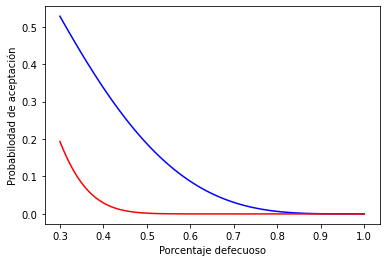

In [6]:
p = np.linspace(0.3,1.,np_)

P1 = np.zeros(shape=np.shape(p))
c = 0
for i in p:
    p_ = 0.
    for j in x1:
        p_ += binomial(j,n1,i)
    P1[c] = p_
    c += 1

P2 = np.zeros(shape=np.shape(p))
c = 0
for i in p:
    p_ = 0.
    for j in x2:
        p_ += binomial(j,n2,i)
    P2[c] = p_
    c += 1

plt.plot(p,P1,color='b',label='Plan 1')
plt.plot(p,P2,color='r',label='Plan 2')
plt.xlabel('Porcentaje defecuoso')
plt.ylabel('Probabilodad de aceptación')

Como podemos observar en la gráfica, el plan de a=1 y n=5 tiene una mayor probabilidad de aceptación en el intervalo indicado. Por lo tanto, un vendedor preferirá este plan de muestreo.

# 2.

In [7]:
N = 10
miu = 1
x = np.zeros(shape=N+1)
c = 0
for i in range(N+1):
    x[i] = int(c)
    c += 1

p = np.zeros(shape=N+1)
c = 0
for i in x:
    p[c] = poisson(i,miu)
    c += 1

C:\Users\ASUS\AppData\Local\Temp/ipykernel_18308/527910528.py:8: DeprecationWarning: Using factorial() with floats is deprecated
  return (np.exp(-miu)*(miu**x))/np.math.factorial(x)


Text(0, 0.5, 'Probabilodad de desconexión')

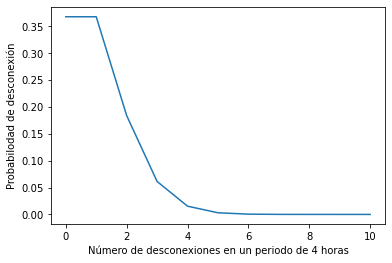

In [8]:
plt.plot(x,p)
plt.xlabel('Número de desconexiones en un periodo de 4 horas')
plt.ylabel('Probabilodad de desconexión')

a) 

P(x>=n) = 1 - P(x=0) + P(x=1) + ... + P(x=n-1)

In [9]:
c = np.zeros(shape=N+1)
c_ = 10
for i in range(N+1):
    c[i] = int(c_)
    c_ = c_ - 1.

p_ = 0.
i = 0
while p_ <= 0.99:
    p_ += p[i]
    i += 1
    #print(p_)

x[i-1]

4.0

el menor valor de n tal que la probabilidad sea menor que 0.01 de que haya al menos n desconexiones en
menos de un perıodo de 4 horas es n=4

b) 

Como la tasa es de 1 desconección por cada cuatro horas. Entonces, diremos que suceden "1/4" de desconecciones por hora.  

Text(0, 0.5, 'Probabilodad de 0 desconecciones')

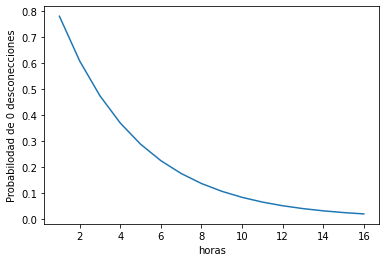

In [10]:
N = 20
miu = 0.25
h = np.zeros(shape=N,dtype=int)
c = 1
for i in range(N):
    h[i] = int(c)
    c += 1

p = 1
p0 = []
h_ = 0
h = []
while p >= 0.02:
    h_ += 1
    h.append(h_)
    p = poisson(0,miu)
    #print(p)
    p0.append(p)
    miu += 0.25

p0 = np.array(p0)
plt.plot(h,p0)
plt.xlabel('horas')
plt.ylabel('Probabilodad de 0 desconecciones')


In [11]:
print(h_,p0[-1])

16 0.01831563888873418


El menor valor del numero de horas h es 16.

c)

P(x>=1,x>=1,x=0) = (1 - p(0)) * (1 - P(0)) * P(0)

In [12]:
(1-poisson(0,1))**2 * poisson(0,1)

0.14699594306608088

La probabilidad de que en 3 perıodos consecutivos de 4 horas, haya solamente un perıodo
de 4 horas sin desconexiones es de 0.147.

d)

La probabilidad de un evento que se puede dar de diferentes formas es la suma las probabilidades de cada una de estas formas.

P(A) = sum(P(ijk)) t.q. i+j+k=3 

In [13]:
digits = [0,1,2,3]
combinations = list(product(digits, repeat=3))

com_ = []
for i in combinations:
    if sum(i) == 3:
        com_.append(i)
com_

[(0, 0, 3),
 (0, 1, 2),
 (0, 2, 1),
 (0, 3, 0),
 (1, 0, 2),
 (1, 1, 1),
 (1, 2, 0),
 (2, 0, 1),
 (2, 1, 0),
 (3, 0, 0)]

Text(0, 0.5, 'Probabilodad de que el número de desconexiones sea el esperado')

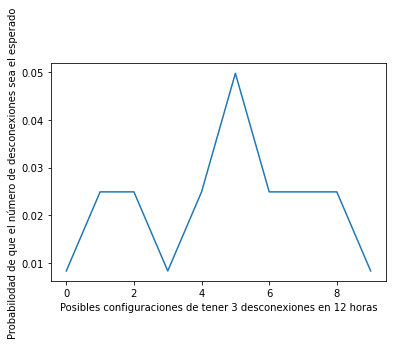

In [14]:
P = []
for i in com_:
    P.append(poisson(i[0],1) * poisson(i[1],1) * poisson(i[2],1))
plt.plot(P)
plt.xlabel('Posibles configuraciones de tener 3 desconexiones en 12 horas')
plt.ylabel('Probabilodad de que el número de desconexiones sea el esperado')

In [15]:
p = sum(P)
p

0.22404180765538775

La probabilidad de que el numero de desconexiones en 3 perıodos consecutivos de 4 horas
sea igual al numero esperao de desconexiones en 3 perıodos consecutivos de 4 horas es de 0.22